# DIS GA Minor Module - supervision practice exercise

-------

**The goal of this exercise is not to write the best code ever, but to explore the data.**  

-------

-------

-------

**The tasks:**

**1. Make an account on the Gaia archive (https://gea.esac.esa.int/archive/) and familiarise yourself with ADQL queries**  
    - To get to the ADQL query page, go to the "Search" tab, then click "Advanced (ADQL)"  
    - There are many query examples available on the Gaia archive page (top right of the page: "Query examples")  
    - you can do queries on the Gaia website, but it may be useful to also try out the Python *astroquery* package to be able to do it in Python (optional)  


**2. Query the Gaia DR3 archive using ADQL and download the Gaia data around the globular cluster NGC 3201**  
    - hint: you can use Simbad (https://simbad.cds.unistra.fr/simbad/sim-fid) to find out more information about this object (and any other astronomical object you may be interested in), e.g. the coordinates, proper motions, parallax, radial velocity (if available), spatial extent, references to papers  
    - hint: what is the spatial extent of a globular cluster? So how large a radius (e.g. in degrees) would be useful to query around the coordinates of the cluster? And do you need all the available Gaia columns or only a subset?   


**3. Create a colour-magnitude diagram (CMD) for this cluster**  
    - Remember that *lower* magnitudes means *brighter* stars  
    - Try removing non-members using the proper motions (and maybe the parallax too). All stars in a globular cluster are expected to have the same proper motions and parallax (but of course the measurements come with uncertainties, which are larger for fainter stars).   
    - Identify the different evolutionary stages of stars on the CMD  
    - Remember that it is usually necessary to deredden the magnitudes. See below for some hints. What are the differences between the reddened and dereddened CMDs?  


**4. *(optional)* Derive and plot the Galactic orbit of this cluster**  
    - You can use the *galpy* package for the orbit integration, which has very good documentation (https://docs.galpy.org/en/v1.9.1/orbit.html). You can use the standard *galpy* Milky Way potential (MWPotential2014).  
    - How does this cluster move with respect to the Galactic disc?
    
    
If you'd like more practice, you can repeat the exercise for another globular cluster. NGC 3201 was a "nice one" because it has relatively low central density and is nearby and therefore the stars have well-measured parallaxes. Other clusters may suffer from bad Gaia data quality in the central regions because they are so dense, and are typically further away and therefore have larger uncertainties on measurements. 
 
-------
 
-------
 
-------

**Some general hints:**

- Remember the typical observers astronomical coordinate system, with coordinates right ascension (RA) and declination (Dec). This is the ICRS coordinate system. A common way of dealing with coordinates in Python is with the *astropy* coordinates package (https://docs.astropy.org/en/stable/coordinates/index.html - *astropy* is a useful astronomy Python package in general with many functionalities). It can for example convert between different coordinate systems (e.g. ICRS and Galactic) or between different notations. 
    - coordinates can be written in the hms/dms notation, e.g. (RA, Dec) = (18h 36m 56.336s +38° 47′ 01.2802″), or in the deg/deg notation, e.g. (RA, Dec) = (279.23473333 38.78368894). 
- The available magnitudes in Gaia are BP (blue), RP (red) and G (overall brightness).  
- Some useful Gaia columns will be (but are not necessarily limited to): source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, pmra, pmdec (and the parallax and proper motion uncertainties)  
- All the Gaia column names are explained here: https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_main_source_catalogue/ssec_dm_gaia_source.html

-----

**Some dereddening hints:**

m = reddened magnitude  
m0 = dereddened magnitude

m0 = m - R\*E(B-V)

===================

Values of R for Gaia magnitudes (from Casagrande et al. 2021, MNRAS, 507, 2684C):  

R_G  = 2.609 - 0.475\*C + 0.053\*C\*\*2  
R_BP = 2.998 - 0.140\*C - 0.175\*C\*\*2 + 0.062\*C\*\*3  
R_RP = 1.689 - 0.059\*C  

where C = (BP - RP)  

===================

E(B-V) is the reddening along the line of sight for a given coordinate. The standard source for getting E(B-V) is the SFD map (Schlegel, Finkbeiner & Davis 1998, ApJ, 500, 525). It can be queried using the Python *dustmaps* package (https://dustmaps.readthedocs.io/en/latest/). 

------

# Solution

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery
import astropy.units as u

## Convert hms/dms coordinates from Simbad to degrees for querying the Gaia archive around this point

In [2]:
ngc3201_coord = SkyCoord('10 17 36.82 -46 24 44.9', unit=(u.hourangle, u.deg))
print(ngc3201_coord.icrs)
# print(ngc3201_coord.galactic)    # if you want to get Galactic coordinates (l,b)

<SkyCoord (ICRS): (ra, dec) in deg
    (154.40341667, -46.41247222)>


## Submitted Gaia query

SELECT g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, g.pmra, g.pmra_error, g.pmdec, g.pmdec_error, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.ruwe  
FROM gaiadr3.gaia_source as g  
WHERE 1 = CONTAINS(  
   POINT(154.40341667, -46.41247222),  
   CIRCLE(g.ra, g.dec, 1))  
AND g.phot_g_mean_mag < 20.5
AND g.parallax IS NOT NULL  

## Read data

In [57]:
gc1 = pd.read_csv('ngc3201.csv')
gc1

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe
0,5365335096777627648,154.721403,-47.385770,0.176923,0.132257,-4.717134,0.131741,2.978151,0.124200,18.625698,19.072947,18.054708,1.003540
1,5365335131137375872,154.747722,-47.383352,0.285468,0.438631,-3.715651,0.444197,2.409187,0.451668,20.137932,20.608614,19.506264,1.020257
2,5365335165497105536,154.753533,-47.379251,0.077742,0.158961,-3.338251,0.156735,2.315270,0.145803,18.865402,19.330550,18.240057,0.983197
3,5365335165503777408,154.757302,-47.374450,1.763738,0.101486,-20.775103,0.096010,4.831782,0.092856,18.041286,19.434060,16.888641,1.053611
4,5365335169793924736,154.755487,-47.376164,1.177675,0.225830,-11.801365,0.221048,1.110616,0.205323,18.776890,19.098927,17.833750,1.571713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184021,5413797794055741056,153.810837,-45.812134,0.340799,0.296992,-4.712990,0.313535,1.658365,0.276674,19.562174,20.102022,18.936445,0.999154
184022,5413797794055741952,153.805011,-45.806425,0.780763,0.013668,-2.621975,0.013549,2.301399,0.013430,13.901972,14.197055,13.443615,0.955114
184023,5413797794055742080,153.800674,-45.803881,0.422145,0.097935,-3.564173,0.098531,1.268674,0.092045,17.992487,18.559477,17.279959,1.024889
184024,5413797794055742208,153.813811,-45.809808,0.422787,0.035155,-6.693069,0.036239,3.469864,0.033843,15.869702,16.166285,15.181020,1.296769


In [58]:
gc1 = gc1[(gc1.phot_g_mean_mag > -99) & (gc1.phot_rp_mean_mag > -99) & (gc1.phot_bp_mean_mag > -99)]

## Make a few overview plots

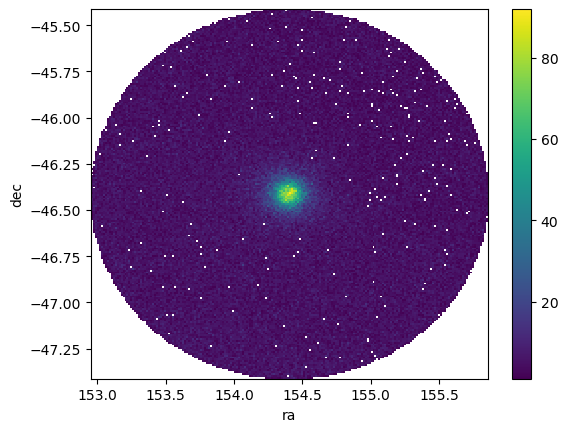

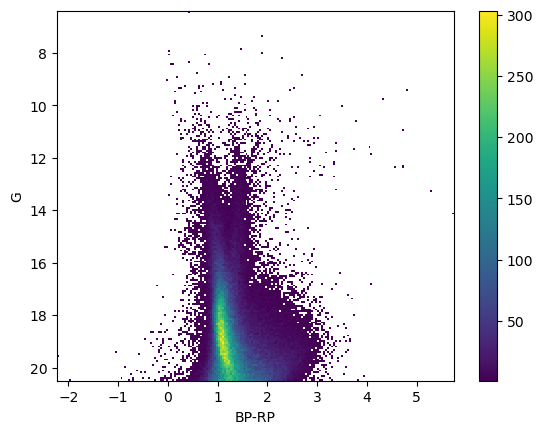

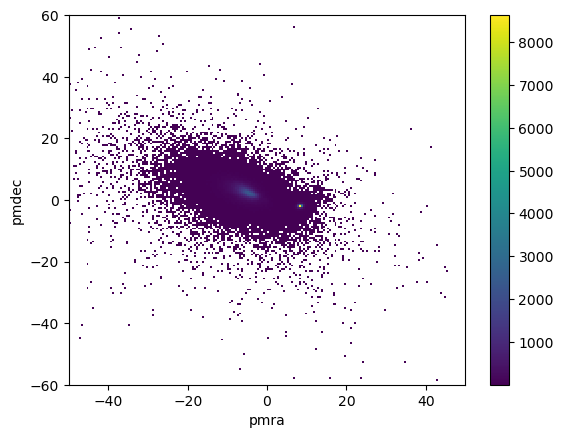

In [ ]:
## no cuts, plot all data first to get a general sense what we're dealing with

## ---------

plt.hist2d(gc1.ra, gc1.dec, bins=200, cmin=1) 
## ---------

plt.colorbar()
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

## ---------

plt.hist2d(gc1.phot_bp_mean_mag - gc1.phot_rp_mean_mag, gc1.phot_g_mean_mag, bins=200, cmin=1)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.show()

## ---------

plt.hist2d(gc1.pmra, gc1.pmdec, bins=200, cmin=1, range=[[-50,50],[-60,60]]) #, vmax=1000)
plt.colorbar()
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.show()

## Make a rough globular cluster selection and plot this

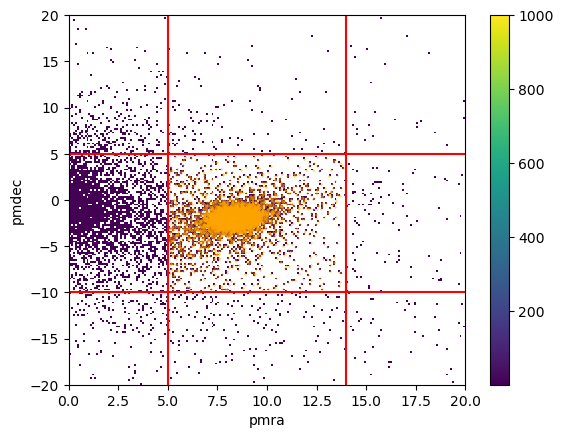

In [60]:
## There are clearly two blobs in pmra-pmdec space. The larger one is Milky Way "field stars", the smaller one is the globular cluster. 
## (you could check this by looking up the reported proper motions for this cluster on Simbad)

## I use a crude selection box to make a first selection of the cluster. But you can be more fancy or be much more strict! See later on. 

pmralim = 5
pmralim2 = 14
pmdeclim = -10
pmdeclim2 = 5
gc1_sel = gc1[(gc1.pmra > pmralim) & (gc1.pmra < pmralim2)
              & (gc1.pmdec > pmdeclim) & (gc1.pmdec < pmdeclim2)]

## ---------

plt.hist2d(gc1.pmra, gc1.pmdec, bins=200, range=[[-0,20],[-20,20]], vmax=1000, cmin=1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')
plt.colorbar()
plt.scatter(gc1_sel.pmra, gc1_sel.pmdec, c='orange', s=0.1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')

plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.axvline(pmralim, color='red')
plt.axvline(pmralim2, color='red')
plt.axhline(pmdeclim, color='red')
plt.axhline(pmdeclim2, color='red')
plt.show()

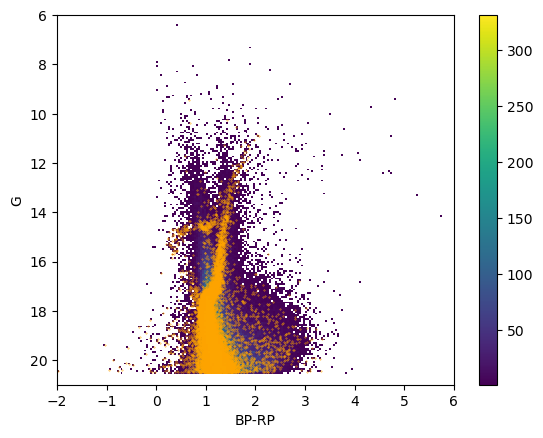

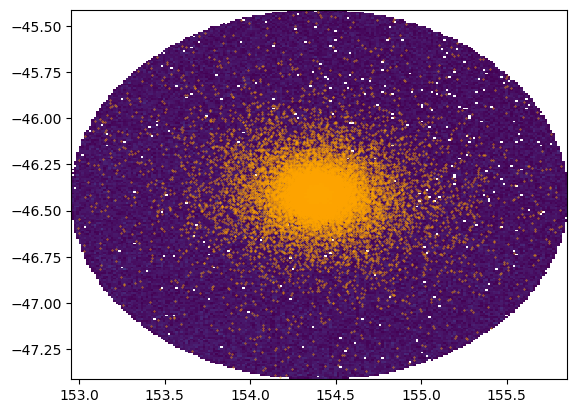

In [61]:
## plot the CMD and on-sky distribution

plt.hist2d(gc1.phot_bp_mean_mag - gc1.phot_rp_mean_mag, gc1.phot_g_mean_mag, 
           bins=200, cmin=1, range=[[-2,6],[6,21]]) 
plt.colorbar()
plt.scatter(gc1_sel.phot_bp_mean_mag - gc1_sel.phot_rp_mean_mag, gc1_sel.phot_g_mean_mag, s=0.1, c='orange')

plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.show()


## ---------------------

plt.hist2d(gc1.ra, gc1.dec, bins=200, cmin=1)
plt.scatter(gc1_sel.ra, gc1_sel.dec, c='orange', s=0.1)
plt.show()

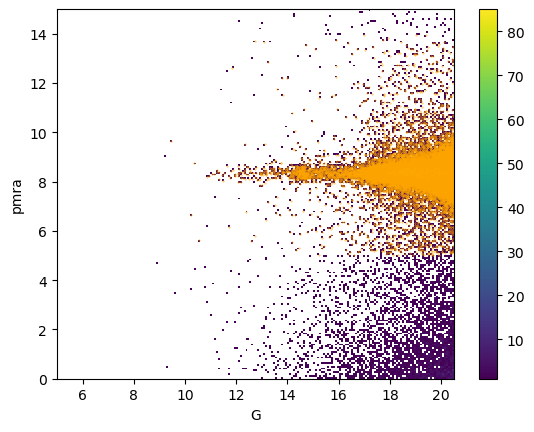

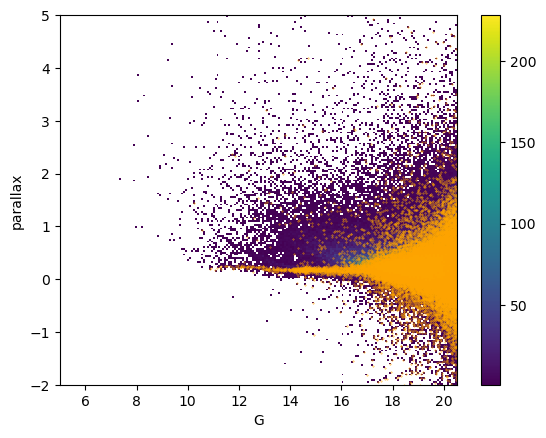

In [62]:
## What do the candidate members look like in proper motion and parallax as function of magnitude?

## ---------

plt.hist2d(gc1.phot_g_mean_mag, gc1.pmra, bins=200, range=[[5,20.5],[-0,15]], cmin=1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')
plt.colorbar()
plt.scatter(gc1_sel.phot_g_mean_mag, gc1_sel.pmra, c='orange', s=0.1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')

plt.xlabel('G')
plt.ylabel('pmra')
plt.show()

## ---------

plt.hist2d(gc1.phot_g_mean_mag, gc1.parallax, bins=200, range=[[5,20.5],[-2,5]], cmin=1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')
plt.colorbar()
plt.scatter(gc1_sel.phot_g_mean_mag, gc1_sel.parallax, c='orange', s=0.1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')

plt.xlabel('G')
plt.ylabel('parallax')
plt.show()

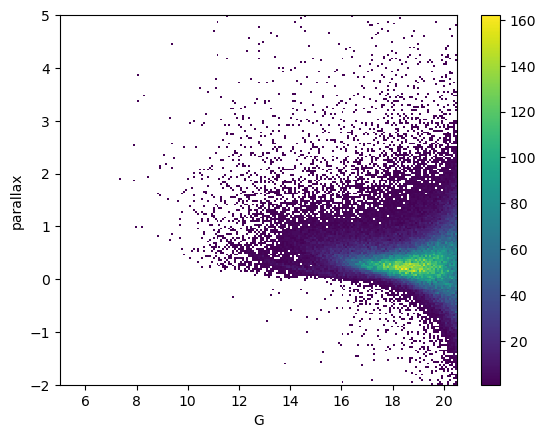

In [63]:
## ---------

field = gc1[(np.sqrt((gc1.ra - 154.40341667)**2 + (gc1.dec - -46.41247222)**2) > 0.5) & (gc1.pmra < 5)]

plt.hist2d(field.phot_g_mean_mag, field.parallax, bins=200, range=[[5,20.5],[-2,5]], cmin=1) #, c=gc1.pmra, vmin=-50, vmax=50, cmap='jet')
plt.colorbar()

plt.xlabel('G')
plt.ylabel('parallax')
plt.show()

## Deredden the CMD

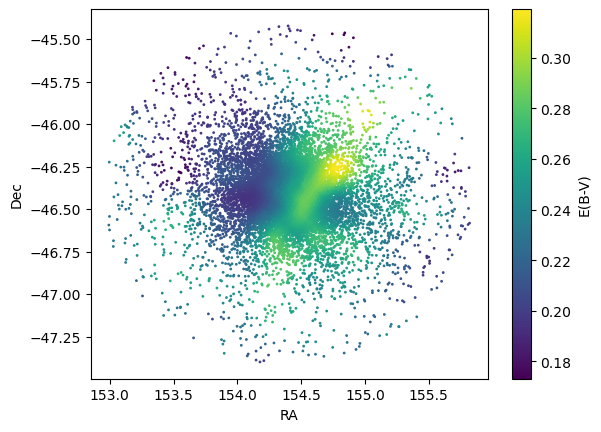

In [64]:
## get the coordinates into the right format for the extinction query

coords = SkyCoord(gc1_sel.ra, gc1_sel.dec, unit=(u.deg, u.deg))

## query the SFD map using the dustmaps package
sfd = SFDQuery()
ebv = sfd(coords)

gc1_sel = gc1_sel.assign(ebv = ebv)

## plot the coordinates colour-coded by the extinction 

plt.scatter(gc1_sel.ra, gc1_sel.dec, c=gc1_sel.ebv,s=1)
plt.colorbar(label='E(B-V)')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [65]:
## apply reddening correction (see hints in instructions)

C = gc1_sel.phot_bp_mean_mag - gc1_sel.phot_rp_mean_mag

i=0
while i < 5:
    R_G = 2.609 - 0.475*C + 0.053*C**2
    R_BP = 2.998 - 0.140*C - 0.175*C**2 + 0.062*C**3
    R_RP = 1.689 - 0.059*C

    ## g0, bp0 and rp0 will be the dereddened G, BP and RP magnitudes
    g0  = gc1_sel.phot_g_mean_mag  - R_G*gc1_sel.ebv
    bp0 = gc1_sel.phot_bp_mean_mag - R_BP*gc1_sel.ebv
    rp0 = gc1_sel.phot_rp_mean_mag - R_RP*gc1_sel.ebv
    
    C = bp0 - rp0
    i+= 1

gc1_sel = gc1_sel.assign(g0 = g0)
gc1_sel = gc1_sel.assign(bp0 = bp0)
gc1_sel = gc1_sel.assign(rp0 = rp0)

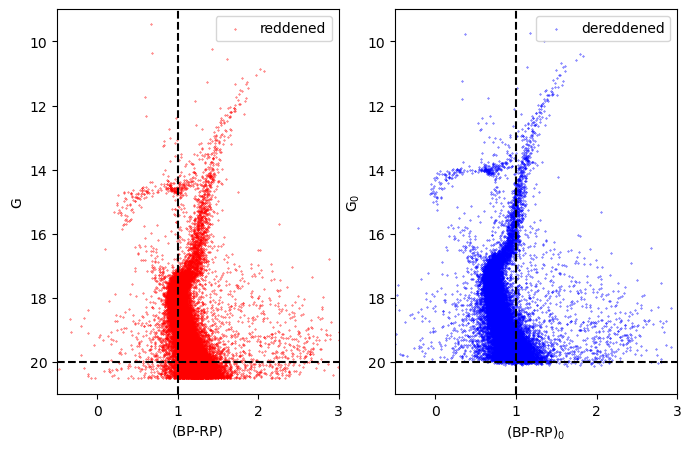

In [67]:
## Plot a comparison of reddened & dereddened photometry

fig, axs = plt.subplots(1, 2, figsize=(8,5))

axs[0].scatter(gc1_sel.phot_bp_mean_mag - gc1_sel.phot_rp_mean_mag, gc1_sel.phot_g_mean_mag, s=0.1, c='red', label='reddened')
axs[1].scatter(gc1_sel.bp0 - gc1_sel.rp0, gc1_sel.g0, s=0.1, c='blue', label='dereddened')

for axi, lab in zip([axs[0],axs[1]],['','$_0$']):
    axi.invert_yaxis()
    axi.set_xlabel('(BP-RP){}'.format(lab))
    axi.set_ylabel('G{}'.format(lab))
    axi.set_xlim(-0.5,3)
    axi.set_ylim(21,9)
    axi.legend()
    axi.axvline(1.0, lw=1.5, ls='--', c='black')
    axi.axhline(20.0, lw=1.5, ls='--', c='black')
plt.show()

## Further cleaning: remove more field stars

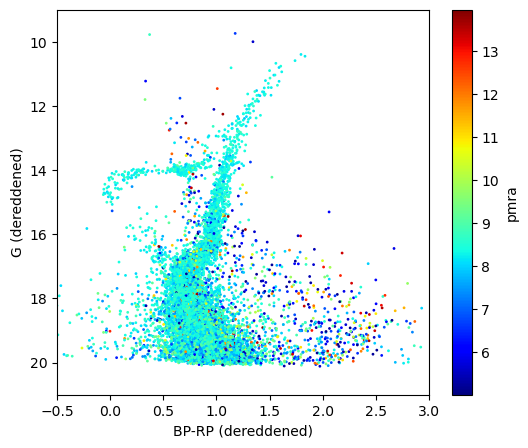

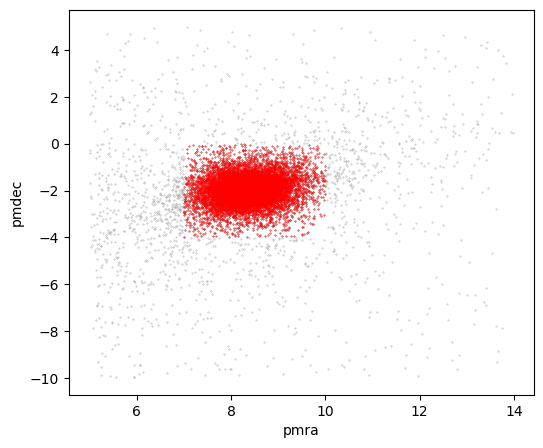

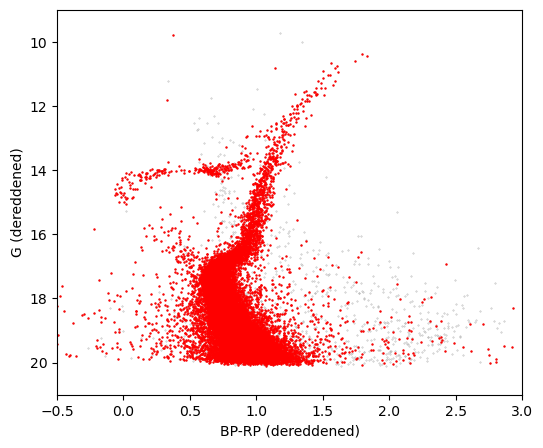

In [68]:
## Colour-code the CMD by proper motions: are some of the outliers away from the sequence clearly off in proper motions? 
## (answer: yes, so need to make a stricter cut)

fig, axs = plt.subplots(1, 1, figsize=(6,5))

plt.scatter(gc1_sel.bp0 - gc1_sel.rp0, gc1_sel.g0, s=1,
           c=gc1_sel.pmra, cmap='jet')
plt.colorbar(label='pmra')

for axi in [axs]:
    axi.invert_yaxis()
    axi.set_xlabel('BP-RP (dereddened)')
    axi.set_ylabel('G (dereddened)')
    axi.set_xlim(-0.5,3)
    axi.set_ylim(21,9)

plt.show()

## -------
## Stricter cut in proper motions

pmralim_v2 = 7
pmralim2_v2 = 10
pmdeclim_v2 = -4
pmdeclim2_v2 = 0
gc1_sel2 = gc1_sel[(gc1_sel.pmra > pmralim_v2) & (gc1_sel.pmra < pmralim2_v2)
              & (gc1_sel.pmdec > pmdeclim_v2) & (gc1_sel.pmdec < pmdeclim2_v2)]

fig, axs = plt.subplots(1, 1, figsize=(6,5))

plt.scatter(gc1_sel.pmra, gc1_sel.pmdec, s=0.1, c='darkgrey')
plt.scatter(gc1_sel2.pmra, gc1_sel2.pmdec, s=0.1, c='red')
plt.xlabel('pmra')
plt.ylabel('pmdec')

plt.show()

## --------
## compare the two CMDs (old and new proper motion cuts)

fig, axs = plt.subplots(1, 1, figsize=(6,5))

plt.scatter(gc1_sel.bp0 - gc1_sel.rp0, gc1_sel.g0, s=0.1, c='darkgrey')
plt.scatter(gc1_sel2.bp0 - gc1_sel2.rp0, gc1_sel2.g0, s=0.5, c='red')

for axi in [axs]:
    axi.invert_yaxis()
    axi.set_xlabel('BP-RP (dereddened)')
    axi.set_ylabel('G (dereddened)')
    axi.set_xlim(-0.5,3)
    axi.set_ylim(21,9)

plt.show()

## -------

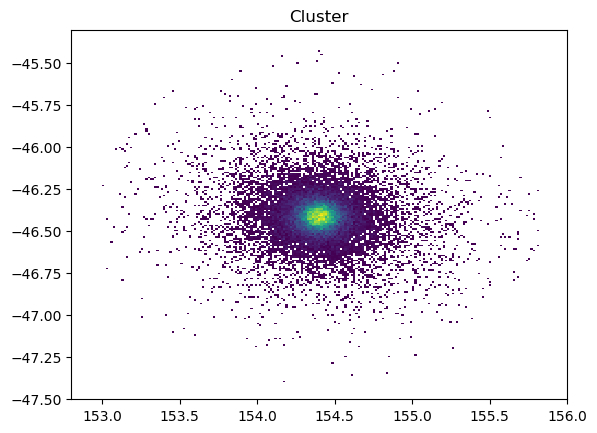

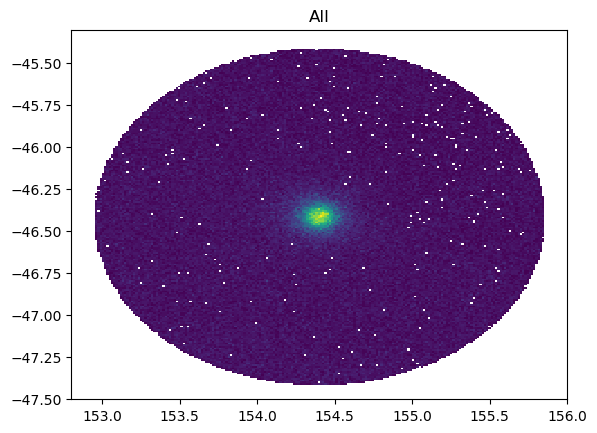

In [69]:
plt.hist2d(gc1_sel2.ra, gc1_sel2.dec, bins=200, cmin=1)
plt.xlim(152.8, 156)
plt.ylim(-47.5, -45.3)
plt.title('Cluster')
plt.show()

plt.hist2d(gc1.ra, gc1.dec, bins=200, cmin=1)
plt.xlim(152.8, 156)
plt.ylim(-47.5, -45.3)
plt.title('All')
plt.show()

## Note how the cluster is quite extended beyond the very high density inner region! 
## This is why it is good to make a large spatial selection at first (like our 1 deg)

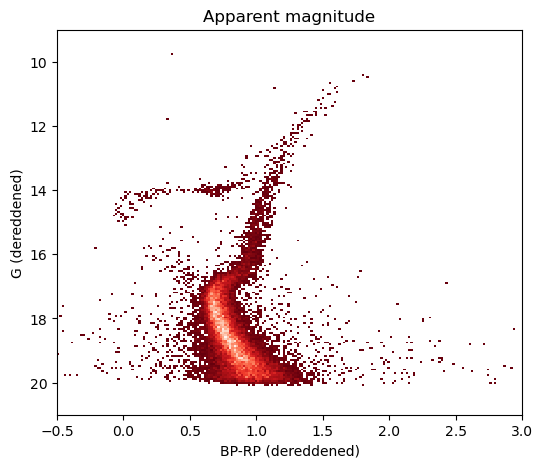

In [70]:
## Final CMD (could be improved more, e.g. using some proper motion / parallax selection as function of G magnitude, but this is good enough)

fig, axs = plt.subplots(1, 1, figsize=(6,5))

plt.hist2d(gc1_sel2.bp0 - gc1_sel2.rp0, gc1_sel2.g0, bins=(200,200), cmin=1, range=[[-0.5,3],[9,21]], cmap='Reds_r')

for axi in [axs]:
    axi.invert_yaxis()
    axi.set_xlabel('BP-RP (dereddened)')
    axi.set_ylabel('G (dereddened)')
    axi.set_xlim(-0.5,3)
    axi.set_ylim(21,9)

plt.title('Apparent magnitude')
plt.show()

## -------

Different evolutionary stages: 
- below G ~ 18: main sequence (+ contamination), stars burning hydrogen in their core
- main-sequence turn-off (MSTO) around G0 = 17.5 and (BP-RP)0 = 0.9, the most massive stars in the cluster that are still alive and burning hydrogen in their core
- horizontal bit around G0 = 17.5: subgiant branch (transition between MSTO & giant branch)
- above the subgiant branch (vertical bit): the giant branch, with its tip around G0 = 11 and (BP-RP)0 = 2.0, hydrogen shell burning, no fusion in the core
- horizontal stripe around G0 ~ 15: horizontal branch, stars burning helium in their core
- (bonus) small plume leaving from the MSTO to the left and up: blue stragglers (apparently young stars, likely the result of mergers and/or binary interaction)

## Compare to an isochrone

Can download isochrones from e.g. here: https://waps.cfa.harvard.edu/MIST/interp_isos.html

In [71]:
iso = pd.read_csv('/Users/ankearentsen/Documents/Werk/teaching/DIS-GA-module/gaiastuff/MIST_mpiso3.csv')  

 # log(age) = 10.05, [M/H] = -0.9 (corresponds to [Fe/H] of around -1.2)


In [72]:
is2 = iso[(iso.EEP < 800)]  # only keep the MS + RGB + RC/HB + eAGB

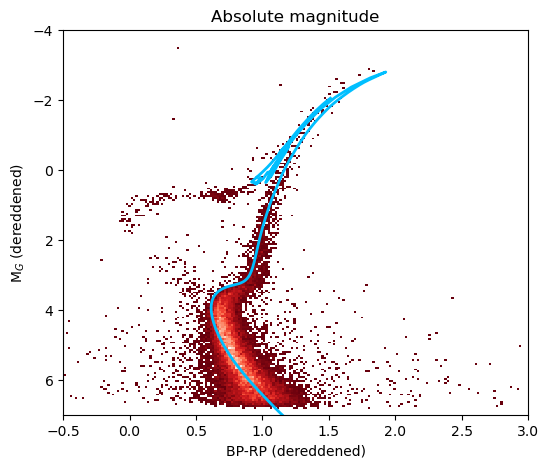

In [73]:
fig, axs = plt.subplots(1, 1, figsize=(6,5))

#### cluster (need to use the *absolute* magnitude)
## adopting 0.222 for the parallax for the cluster from Simbad 
## (but could be derived from data above, or could use individual parallaxes, although this is less good for faint stars)

plt.hist2d(gc1_sel2.bp0 - gc1_sel2.rp0, gc1_sel2.g0 - 5 * np.log10(1/0.222 * 1000) + 5, bins=(200,200), cmin=1, range=[[-0.5,3],[-4,7]], cmap='Reds_r')

#### isochrone
plt.plot(is2.Gaia_BP_EDR3 - is2.Gaia_RP_EDR3, is2.Gaia_G_EDR3, color='deepskyblue', lw=2)

for axi in [axs]:
    axi.invert_yaxis()
    axi.set_xlabel('BP-RP (dereddened)')
    axi.set_ylabel('M$_G$ (dereddened)')
    axi.set_xlim(-0.5,3)
    # axi.set_ylim(21,9)

plt.title('Absolute magnitude')
plt.show()

# Orbits

In [74]:
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014

In [75]:
c= SkyCoord(ra=154.40341667*u.deg,dec=-46.41247222*u.deg,distance=1/0.222*u.kpc,
                pm_ra_cosdec=8.35*u.mas/u.yr,pm_dec=-2.0*u.mas/u.yr,
                radial_velocity=494.3*u.km/u.s)

## values taken from Simbad, could derive them ourselves though using the Gaia data

In [76]:
o= Orbit(c)

In [77]:
ts= np.linspace(0.,100.,2001)
o.integrate(ts,MWPotential2014)

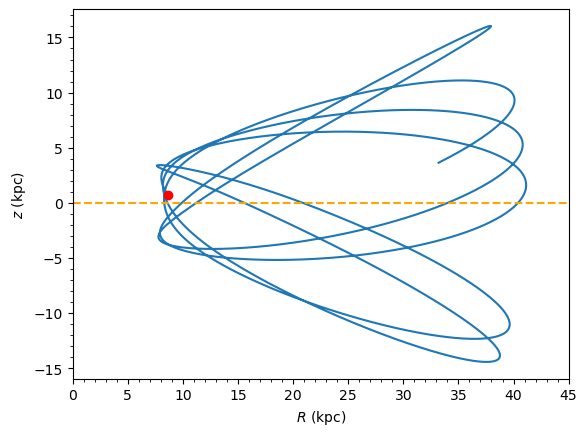

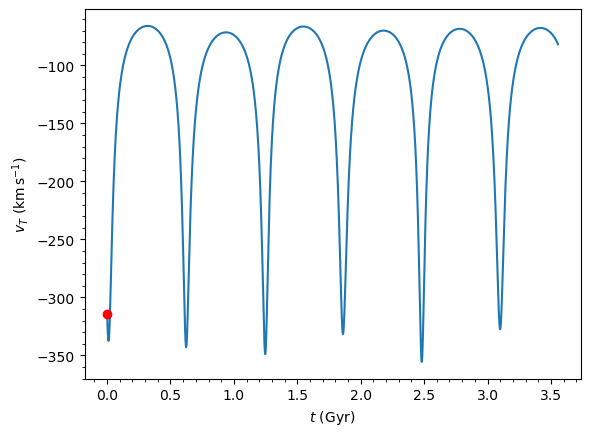

In [78]:
o.plot(d1='R',d2='z')
plt.plot([o.R()],[o.z()],'ro')
plt.axhline(0.0, c='orange', ls='--')
plt.xlim(0,45)
plt.show()

o.plot(d1='t',d2='vT')
plt.plot(0,[o.vT()],'ro')
plt.show()

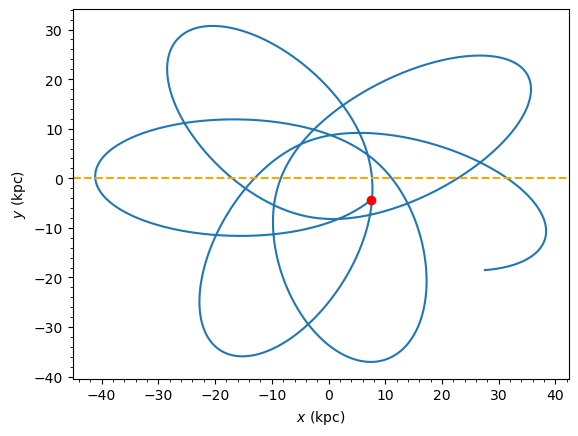

In [79]:
o.plot(d1='x',d2='y')
plt.plot([o.x()],[o.y()],'ro')
plt.axhline(0.0, c='orange', ls='--')
# plt.xlim(0,45)
plt.show()